# Data Analysis & Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
divvydf = pd.read_csv("cleaned_2024_divvy_data.csv")
weatherdf = pd.read_json("weather_2024.json")

In [3]:
divvydf.head()

,ride_id,rideable_type,start_date,start_time,end_date,end_time
0,C1D650626C8C899A,electric_bike,2024-01-12,15:30:27,2024-01-12,15:37:59
1,EECD38BDB25BFCB0,electric_bike,2024-01-08,15:45:46,2024-01-08,15:52:59
2,F4A9CE78061F17F7,electric_bike,2024-01-27,12:27:19,2024-01-27,12:35:19
3,0A0D9E15EE50B171,classic_bike,2024-01-29,16:26:17,2024-01-29,16:56:06
4,33FFC9805E3EFF9A,classic_bike,2024-01-31,05:43:23,2024-01-31,06:09:35


In [4]:
weatherdf.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,2024-01-01,0.00,0.0,0.0,31,32,27
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,2024-01-02,0.00,0.0,0.0,30,39,26
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,2024-01-03,0.00,0.0,0.0,33,36,31
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,2024-01-04,0.00,0.0,0.0,32,37,24
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,2024-01-05,0.01,0.1,0.0,31,37,26


# When are Divvy bikes most frequently used in terms of time of day, day of the week, and season?

In [5]:
# Convert to datetime format
divvydf['start_time'] = pd.to_datetime(divvydf['start_time'])
divvydf['start_date'] = pd.to_datetime(divvydf['start_date'])

# Extract time-related features
divvydf['hour'] = divvydf['start_time'].dt.hour
divvydf['weekday'] = divvydf['start_date'].dt.day_name()
divvydf['month'] = divvydf['start_date'].dt.month_name()


In [6]:
# Prepare data for plots
hourly_usage = divvydf['hour'].value_counts().sort_index()
weekday_usage = divvydf['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
monthly_usage = divvydf['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).dropna()

display(hourly_usage,weekday_usage,monthly_usage)

0      68231
1      43836
2      26148
3      16032
4      15171
5      46742
6     132831
7     253940
8     331121
9     250518
10    247763
11    299326
12    347183
13    353159
14    359731
15    421358
16    534557
17    597191
18    480684
19    343514
20    244721
21    193908
22    152091
23    100601
Name: hour, dtype: int64

Monday       788188
Tuesday      803077
Wednesday    879625
Thursday     835692
Friday       841477
Saturday     925097
Sunday       787201
Name: weekday, dtype: int64

January      144873
February     223164
March        301687
April        415025
May          609493
June         710747
July         749004
August       755804
September    820867
October      616292
November     335042
December     178359
Name: month, dtype: int64

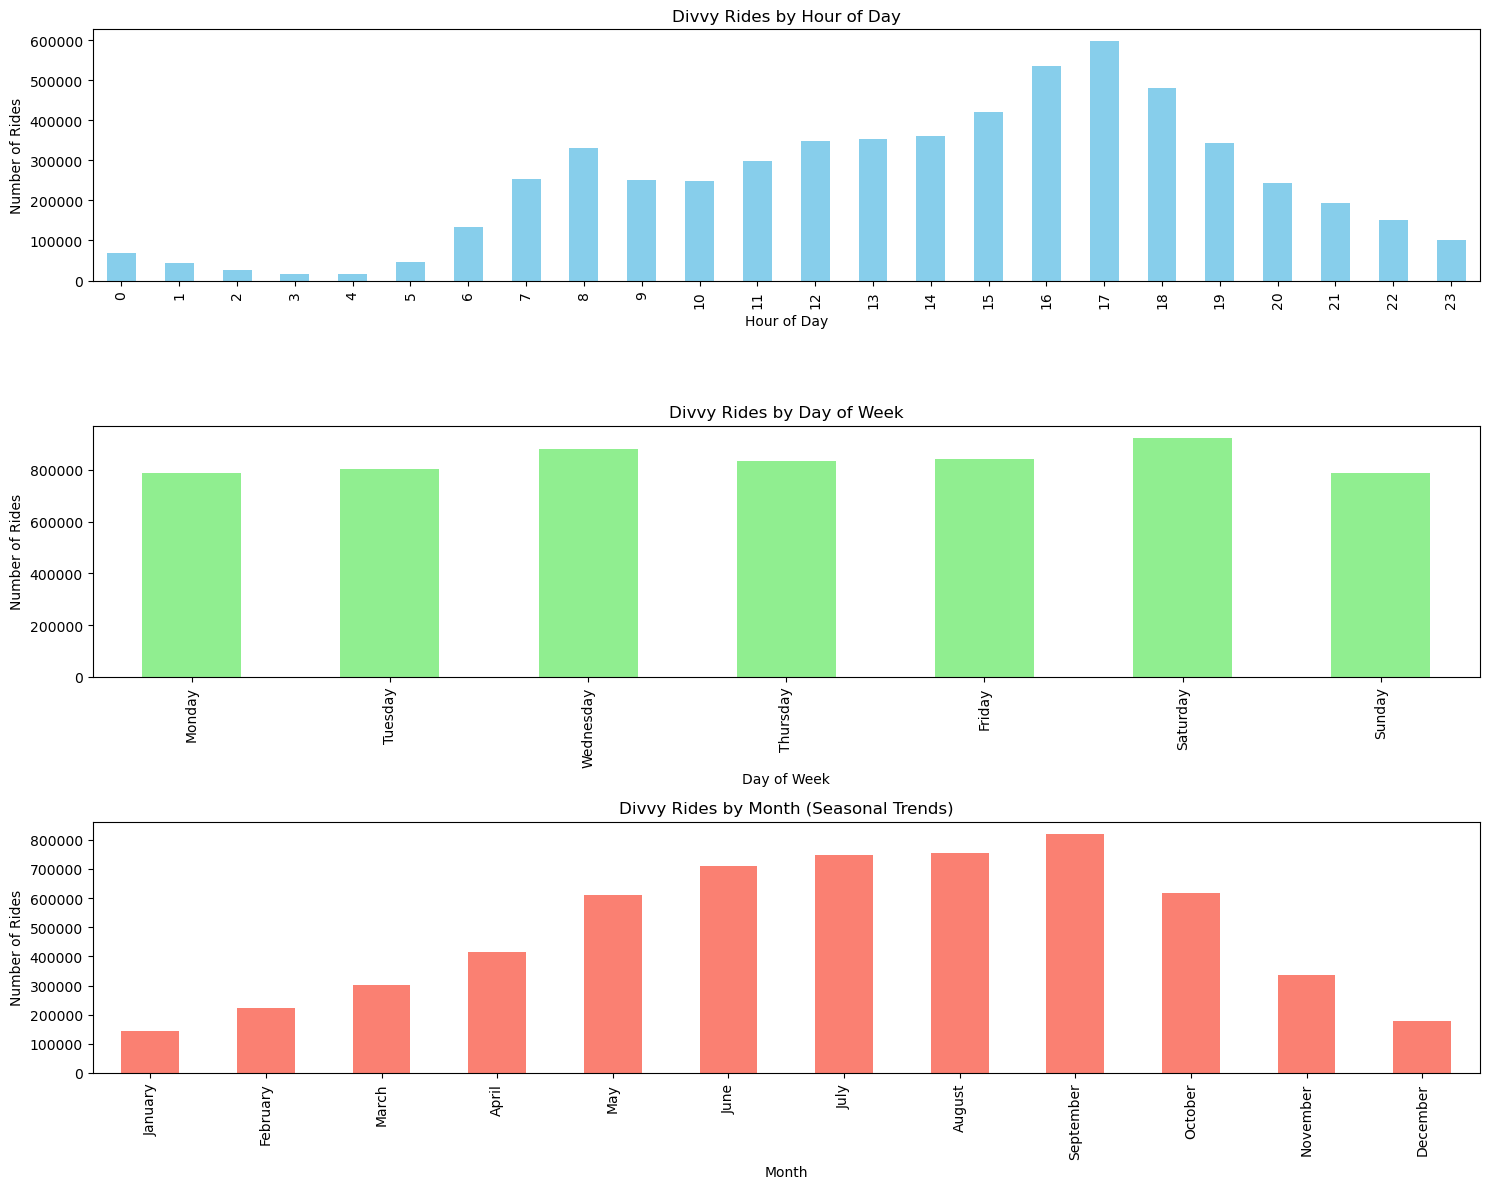

In [7]:
# Plotting
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
hourly_usage.plot(kind='bar', color='skyblue')
plt.title("Divvy Rides by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")

plt.subplot(3, 1, 2)
weekday_usage.plot(kind='bar', color='lightgreen')
plt.title("Divvy Rides by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")

plt.subplot(3, 1, 3)
monthly_usage.plot(kind='bar', color='salmon')
plt.title("Divvy Rides by Month (Seasonal Trends)")
plt.xlabel("Month")
plt.ylabel("Number of Rides")

plt.tight_layout()
plt.show()

# How does temperature impact Divvy rides?

In [8]:
#Displays the daily trips made on each date
daily_trips = divvydf.groupby("start_date").size().reset_index(name="trip_count")

daily_trips

,start_date,trip_count
0,2024-01-01,3658
1,2024-01-02,6533
2,2024-01-03,7468
3,2024-01-04,8120
4,2024-01-05,7383
...,...,...
361,2024-12-27,3513
362,2024-12-28,5732
363,2024-12-29,1903
364,2024-12-30,6413


In [9]:
weatherdf["DATE"] = pd.to_datetime(weatherdf["DATE"])
weatherdf["start_date"] = weatherdf["DATE"]
weatherdf.drop(columns="DATE", inplace=True, errors="ignore")

# Merge datasets on date
merged_df = pd.merge(daily_trips, weatherdf, on = "start_date")

#Save Merge Dataset
merged_df.to_csv("merged.csv", index=False)

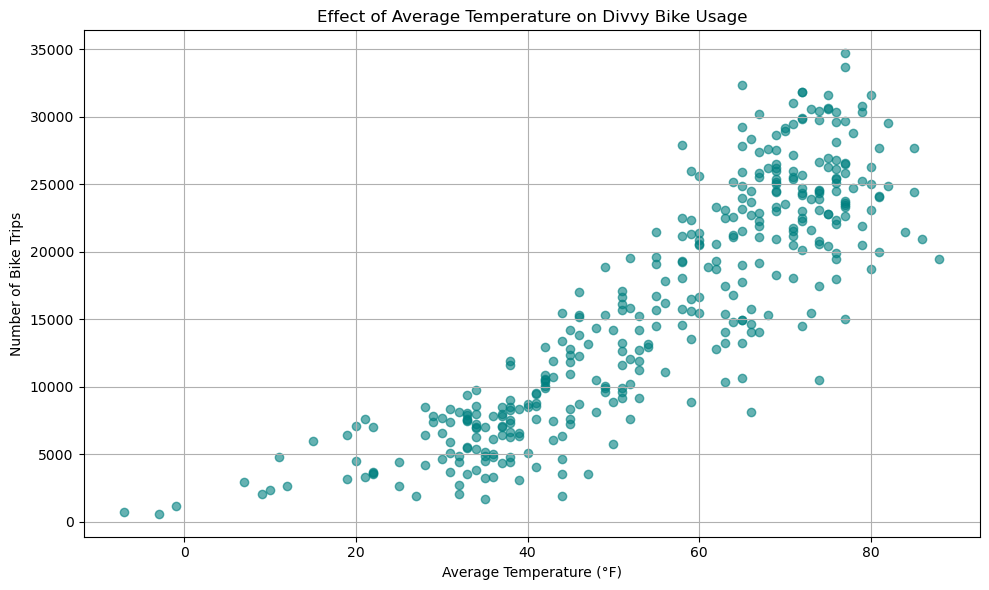

In [10]:
#TAVG vs trip_count
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["TAVG"], merged_df["trip_count"], alpha=0.6, color="teal")
plt.title("Effect of Average Temperature on Divvy Bike Usage")
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Number of Bike Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

# How do weather conditions, such as Snow and precipitation, impact the daily volume of Divvy bike rides?

In [11]:
merged_df["PRCP"].value_counts().sort_index()

0.00    241
0.01     15
0.02      7
0.03      8
0.04      3
0.05      2
0.06      4
0.07      3
0.08      5
0.09      4
0.10      2
0.11      3
0.12      1
0.13      2
0.14      1
0.15      1
0.16      1
0.17      1
0.18      2
0.19      1
0.20      2
0.21      3
0.22      2
0.23      1
0.25      1
0.26      2
0.27      1
0.28      3
0.30      2
0.33      1
0.34      1
0.36      2
0.37      1
0.38      3
0.40      2
0.42      1
0.43      2
0.44      1
0.45      2
0.47      2
0.48      1
0.51      2
0.53      1
0.57      2
0.58      1
0.63      2
0.64      1
0.66      1
0.74      1
0.75      1
0.77      1
0.78      1
0.80      1
0.91      2
0.93      1
0.95      1
1.07      1
1.28      1
1.60      1
1.64      1
Name: PRCP, dtype: int64

In [12]:
merged_df["SNOW"].value_counts().sort_index()

0.0    349
0.1      2
0.2      1
0.3      1
0.4      1
0.5      1
0.8      2
1.0      1
1.1      1
1.2      1
1.7      1
2.4      1
2.6      1
2.8      1
2.9      1
4.7      1
Name: SNOW, dtype: int64

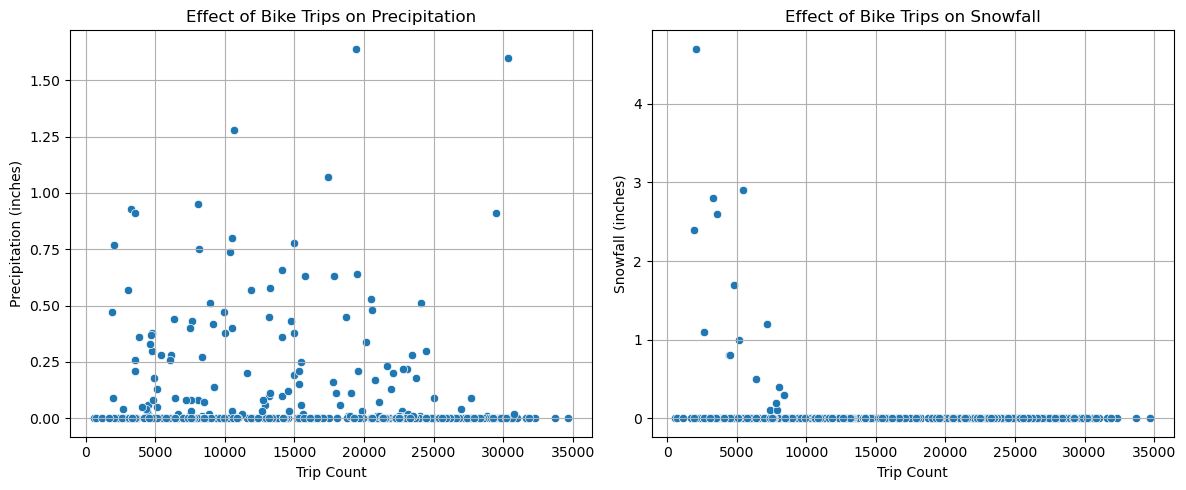

In [13]:
#Trip count during Precipitation & Snowfall
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x="trip_count", y="PRCP")
plt.title("Effect of Bike Trips on Precipitation")
plt.xlabel("Trip Count")
plt.ylabel("Precipitation (inches)")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x="trip_count", y="SNOW")
plt.title("Effect of Bike Trips on Snowfall")
plt.xlabel("Trip Count")
plt.ylabel("Snowfall (inches)")
plt.grid(True)

plt.tight_layout()
plt.show()



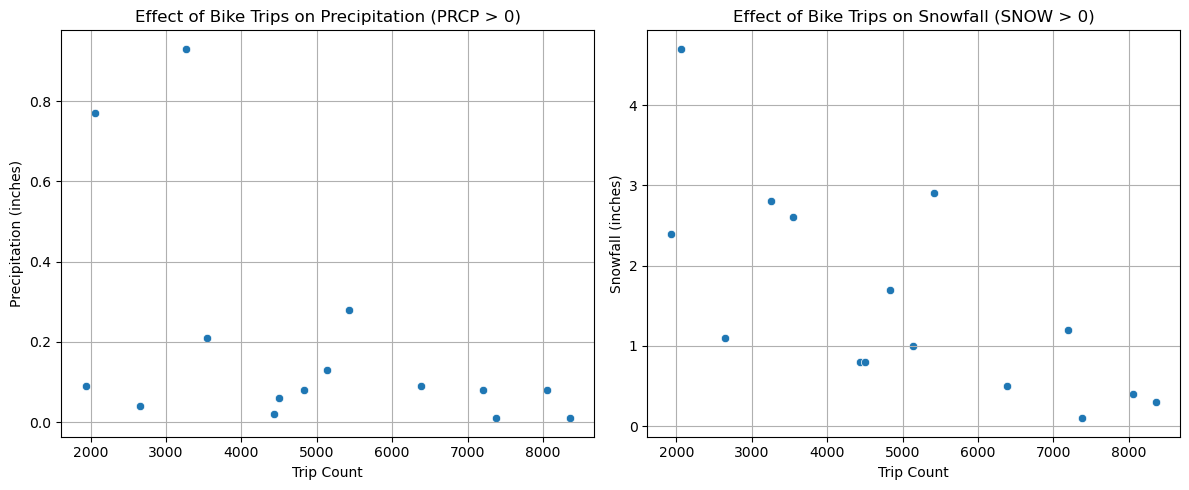

In [14]:
#Trip Count vs Precipitation (only on days it rained/snowed)
updated_df = merged_df[(merged_df["SNOW"] > 0) & (merged_df["PRCP"] > 0.0)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=updated_df, x="trip_count", y="PRCP")
plt.title("Effect of Bike Trips on Precipitation (PRCP > 0)")
plt.xlabel("Trip Count")
plt.ylabel("Precipitation (inches)")
plt.grid(True)


plt.subplot(1, 2, 2)
sns.scatterplot(data=updated_df, x="trip_count", y="SNOW")
plt.title("Effect of Bike Trips on Snowfall (SNOW > 0)")
plt.xlabel("Trip Count")
plt.ylabel("Snowfall (inches)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
merged_df[merged_df["PRCP"]>0]

,start_date,trip_count,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
4,2024-01-05,7383,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.01,0.1,0.0,31,37,26
5,2024-01-06,3542,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.21,2.6,2.0,33,34,31
6,2024-01-07,4440,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.02,0.8,3.1,32,34,31
7,2024-01-08,8052,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.08,0.4,1.2,33,36,30
8,2024-01-09,3261,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.93,2.8,1.2,35,36,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2024-12-20,4827,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.08,1.7,2.0,32,35,21
360,2024-12-26,4045,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.05,0.0,0.0,41,48,38
361,2024-12-27,3513,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.26,0.0,0.0,47,52,45
363,2024-12-29,1903,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,0.47,0.0,0.0,44,46,36
